In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import pandas_profiling

In [3]:
test1 = pd.read_csv('titanic_test.csv')
passengerid = test1.PassengerId

In [4]:
train = pd.read_csv('titanic_train.csv',index_col = 0)
test = pd.read_csv('titanic_test.csv',index_col = 0)

In [5]:
#train.profile_report()

In [6]:
#test.profile_report()

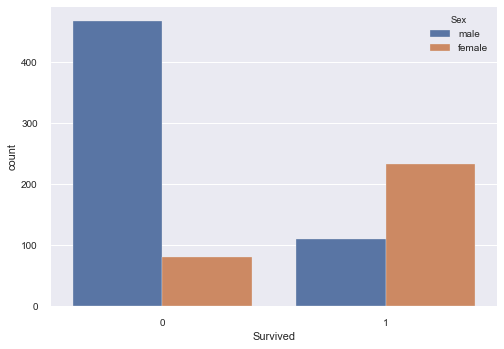

In [7]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex')

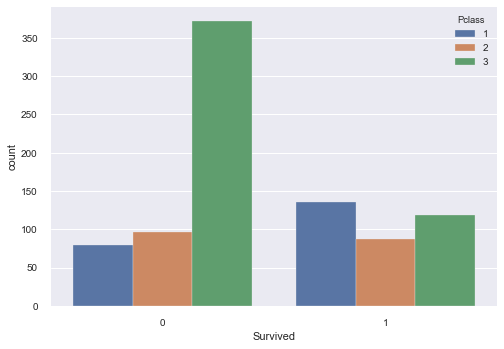

In [8]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

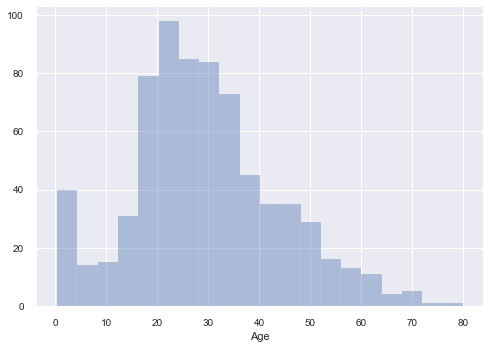

In [9]:
sns.distplot(train['Age'].dropna(), kde= False)

## Missing data


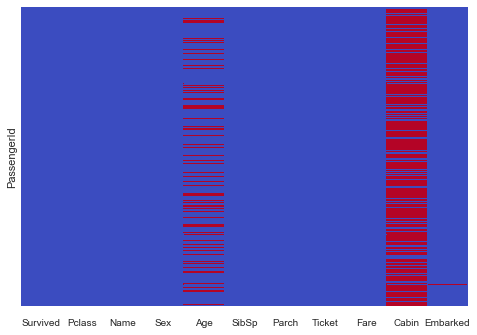

In [10]:
sns.heatmap(train.isnull(), yticklabels= False, cmap ='coolwarm', cbar= False)

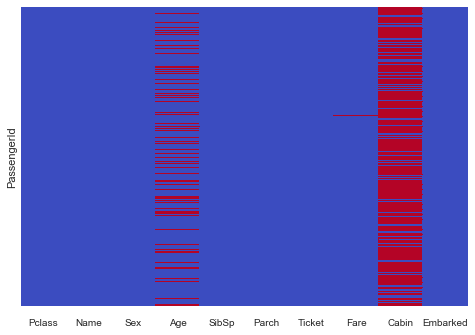

In [11]:
sns.heatmap(test.isnull(), yticklabels= False, cmap ='coolwarm', cbar= False)

In [12]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Missing value in Embark, train_data. 


#### Find the class of Embarked of people who paied 80 for Fare, in Pclass 1 

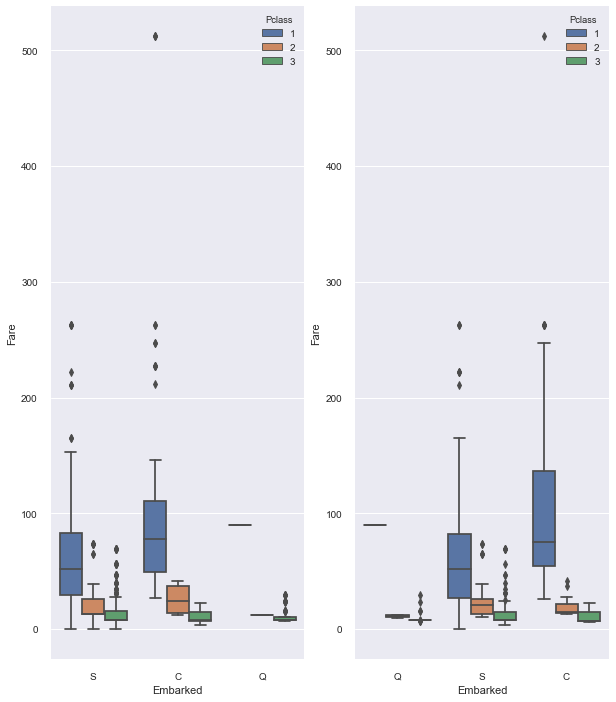

In [13]:
fig,ax = plt.subplots(figsize = (10,12), ncols =2 )
ax1 = sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Pclass', data =train, ax=ax[0])
ax2 =sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Pclass', data =test, ax=ax[1])

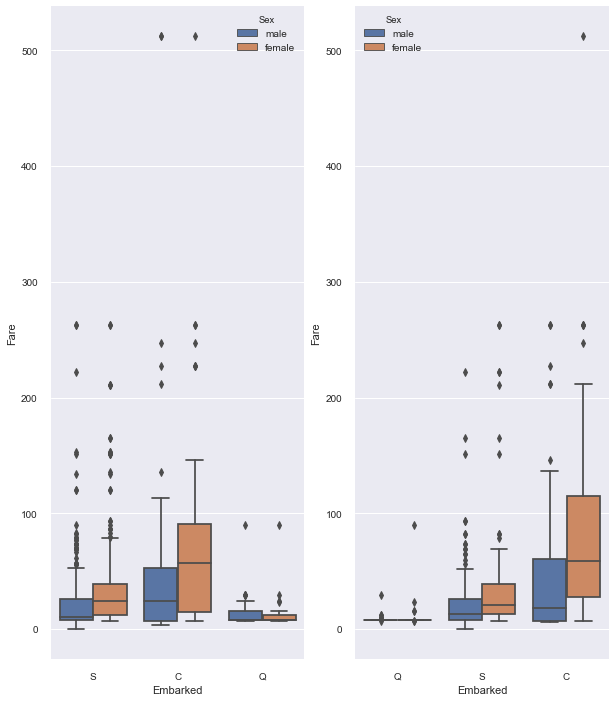

In [14]:
fig,ax = plt.subplots(figsize = (10,12), ncols =2 )
ax3 = sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Sex', data =train, ax=ax[0])
ax4 =sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Sex', data =test, ax=ax[1])

#### From the plot we can see that woman at average of 80 Fare will in C Embarked 

In [15]:
train['Embarked'].fillna('C',inplace=True)

In [16]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


### Missing value in Fare, test_Data

In [17]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [18]:
missing_con = (test.Sex == 'male' )&( test.Pclass == 3 )& (test.Embarked == 'S')

In [19]:
far_mean = test[missing_con].Fare.mean()

In [20]:
test['Fare'].fillna('12',inplace=True)

In [21]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


### Missing value in Age, train_data

In [22]:
train = train.drop('Cabin' ,axis = 1)



In [23]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
train['Sex'] = train['Sex'].map({'male':1 , "female":0}).astype(int)
test['Sex'] = test['Sex'].map({'male':1 , "female":0}).astype(int)

In [25]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [26]:
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [27]:
train = train.drop('Cabin' ,axis = 1)

KeyError: "['Cabin'] not found in axis"

In [28]:
train_fe =train

In [29]:
test = test.drop('Cabin' ,axis = 1)


In [30]:
test_fe =test

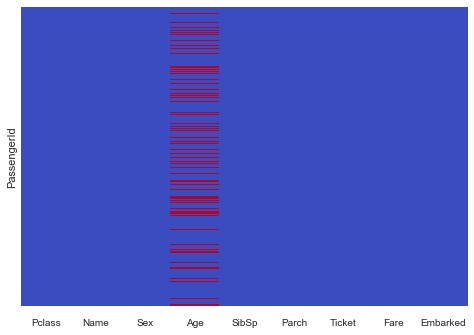

In [31]:
sns.heatmap(test.isnull(), yticklabels= False, cmap ='coolwarm', cbar= False)

In [32]:
train = train.drop(['Ticket'] ,axis = 1)


In [33]:
test = test.drop(['Ticket'] ,axis = 1)

In [34]:
#train = pd.get_dummies(train,columns=['Sex', 'Embarked'], drop_first = False )
#drop_first mean drop first level so that we can have k-1 dummy var
#test = pd.get_dummies(test,columns=['Sex', 'Embarked'], drop_first = False )

In [35]:
test.Fare = test.Fare.astype(int)


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null int32
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null int32
Embarked    418 non-null int32
dtypes: float64(1), int32(3), int64(3), object(1)
memory usage: 44.5+ KB


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int32
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 102.6+ KB


In [38]:
train['family_size'] = train['SibSp'] + train.Parch + 1
test['family_size'] = test['SibSp'] + test.Parch + 1
# at least one people in the family_size

In [43]:
def family_group(size):
    a = ''
    if (size <=1):
        a = '0'
    elif (size <=4):
        a = '1'
    else:
        a = '2'
    return a

In [44]:
train['family_group'] = train['family_size'].map(family_group).astype(int)
test['family_group'] = test['family_size'].map(family_group).astype(int)

In [45]:
train['caculated_fare'] = train.Fare / train.family_size


In [46]:
test['caculated_fare'] = test.Fare.astype(int) / test.family_size

In [47]:
def fare_group(fare):
    a = ''
    if (fare <=7.25):
        a = '0'
    elif (fare <=7.8):
        a = '1'
    elif (fare <=15):
        a = '2'
    elif (fare <=24):
        a = '3'
    else:
        a = '4'
    return a

In [48]:
train['fare_group'] = train['caculated_fare'].map(fare_group).astype(int)
test['fare_group'] = test['caculated_fare'].map(fare_group).astype(int)

In [49]:
def alone(family_group):
    a = ''
    if (family_group == 0):
        a = 0
    else:
        a = 1
    return a
    

In [50]:
train['is_alone'] = train['family_group'].map(alone).astype(int)
test['is_alone'] = test['family_group'].map(alone).astype(int)

In [51]:
name_list = list(train['Name'])
titles = []
for name in name_list:
    titles.append(name.split(',')[1].split(' ')[1])
titles[759] = "the Countess."

In [52]:
name_listt = list(test['Name'])
titless = []
for name in name_listt:
    titless.append(name.split(',')[1].split(' ')[1])

In [53]:
import collections
collections.Counter(titles)

Counter({'Capt.': 1,
         'Col.': 2,
         'Don.': 1,
         'Dr.': 7,
         'Jonkheer.': 1,
         'Lady.': 1,
         'Major.': 2,
         'Master.': 40,
         'Miss.': 182,
         'Mlle.': 2,
         'Mme.': 1,
         'Mr.': 517,
         'Mrs.': 125,
         'Ms.': 1,
         'Rev.': 6,
         'Sir.': 1,
         'the Countess.': 1})

In [54]:
collections.Counter(titless)

Counter({'Col.': 2,
         'Dona.': 1,
         'Dr.': 1,
         'Master.': 21,
         'Miss.': 78,
         'Mr.': 240,
         'Mrs.': 72,
         'Ms.': 1,
         'Rev.': 2})

In [55]:
# Convert titles to numerical values
#library collection
counter_list = collections.Counter(titles).most_common()
print("Before:", counter_list)
threshold_to_be_others = 10
# count unique elements with amount > threshold_to_be_others
others_index = 0
for count in counter_list:
    if count[1] > threshold_to_be_others:
        others_index += 1
for rank in range(len(counter_list)):
    if counter_list[rank][1] < threshold_to_be_others:
        titles = [others_index if ele==counter_list[rank][0] else ele for ele in titles]
    else:
        titles = [rank if ele==counter_list[rank][0] else ele for ele in titles]
print("After:", collections.Counter(titles))

Before: [('Mr.', 517), ('Miss.', 182), ('Mrs.', 125), ('Master.', 40), ('Dr.', 7), ('Rev.', 6), ('Major.', 2), ('Mlle.', 2), ('Col.', 2), ('Don.', 1), ('Mme.', 1), ('Ms.', 1), ('Lady.', 1), ('Sir.', 1), ('Capt.', 1), ('the Countess.', 1), ('Jonkheer.', 1)]
After: Counter({0: 517, 1: 182, 2: 125, 3: 40, 4: 27})


In [56]:
counter_listt = collections.Counter(titless).most_common()
print("Before:",counter_listt)
threshold_to_be_others = 10
# count unique elements with amount > threshold_to_be_others
others_index = 0
for count in counter_listt:
    if count[1] > threshold_to_be_others:
        others_index += 1
for rank in range(len(counter_listt)):
    if counter_listt[rank][1] < threshold_to_be_others:
        titless = [others_index if ele==counter_listt[rank][0] else ele for ele in titless]
    else:
        titless = [rank if ele==counter_listt[rank][0] else ele for ele in titless]
print("After:", collections.Counter(titless))

Before: [('Mr.', 240), ('Miss.', 78), ('Mrs.', 72), ('Master.', 21), ('Col.', 2), ('Rev.', 2), ('Ms.', 1), ('Dr.', 1), ('Dona.', 1)]
After: Counter({0: 240, 1: 78, 2: 72, 3: 21, 4: 7})


In [57]:
train['Title'] = pd.DataFrame({'Title': titles}).shift(1)
train['Title'].iloc[-1] = titles[-1]
train["Title"] = train["Title"].astype(int)

C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
new_title_df = pd.DataFrame({'Title': titless})
new_title_df.index = range(892,len(new_title_df)+892)
test['Title'] = new_title_df
test['Title']

PassengerId
892     0
893     2
894     0
895     0
896     2
       ..
1305    0
1306    4
1307    0
1308    0
1309    3
Name: Title, Length: 418, dtype: int64

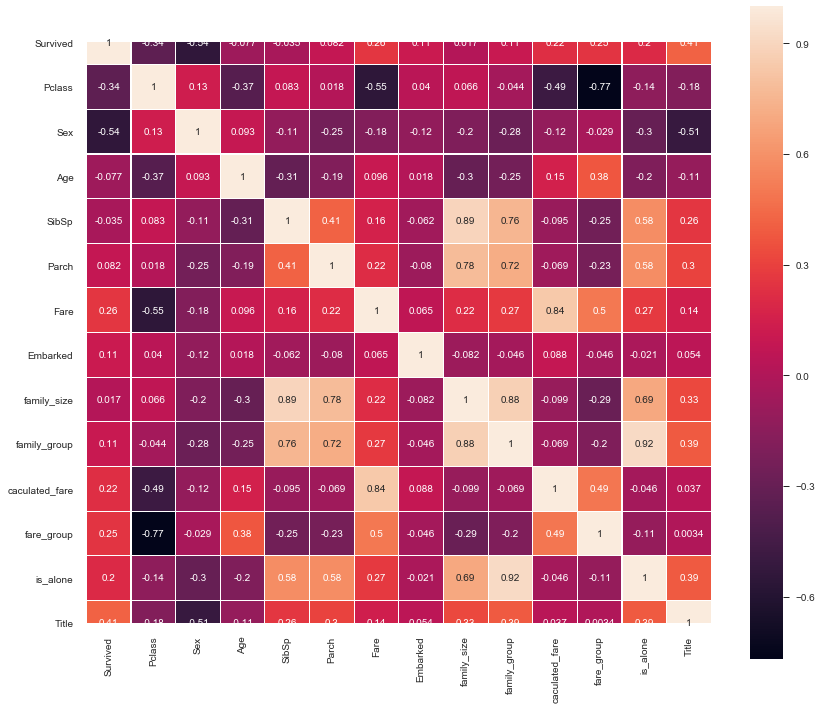

In [59]:
plt.figure(figsize=(14,12))
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)

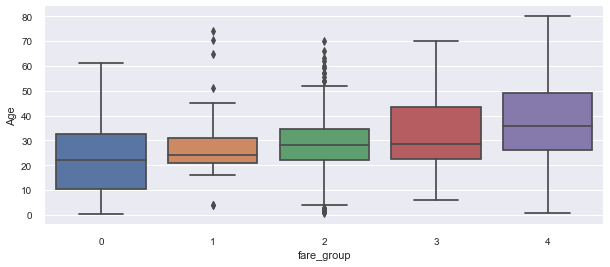

In [60]:
plt.figure(figsize = (10,4))
sns.boxplot(x = 'fare_group', y = 'Age', data = train)

In [61]:
age_0 = round(np.mean(train[train['fare_group']== 0]['Age']))
age_1 = round(np.mean(train[train['fare_group']== 1]['Age']))
age_2 = round(np.mean(train[train['fare_group']== 2]['Age']))
age_3 = round(np.mean(train[train['fare_group']== 3]['Age']))
age_4 = round(np.mean(train[train['fare_group']== 4]['Age']))


In [62]:

def get_null_values(col):

    if pd.isnull(col['Age']):
        
        if col['fare_group'] == 0:
            return age_0
        elif col['fare_group'] == 1:
            return age_1
        elif col['fare_group'] == 2:
            return age_2
        elif col['fare_group'] == 3:
            return age_3
        else:
            return age_4
    return col['Age']
train['Age'] = train[['Age', 'fare_group']].apply(get_null_values, axis = 1)
test['Age'] = test[['Age', 'fare_group']].apply(get_null_values, axis = 1)

In [63]:
def Age_group(age):
    a = ''
    if (age <=16):
        a = 0
    elif (age <=32):
        a = 1
    elif (age <=48):
        a = 2
    elif (age <=64):
        a = 3
    else:
        a = 4
    return a
train['Age_group'] = train['Age'].map(Age_group).astype(int)
test['Age_group'] = test['Age'].map(Age_group).astype(int)

In [64]:
train.drop(['family_size','Fare'],axis =1, inplace=True)

In [65]:
test.drop(['family_size','Fare'],axis =1, inplace=True)

In [66]:
train.drop(['SibSp','Parch'],axis =1, inplace=True)

In [67]:
test.drop(['SibSp','Parch'],axis =1, inplace=True)


In [68]:
test.drop(['Age'],axis =1, inplace=True)
train.drop(['Age'],axis =1, inplace=True)

In [69]:
test.drop(['Name'],axis =1, inplace=True)
train.drop(['Name'],axis =1, inplace=True)

In [70]:
x_data = train.drop('Survived',axis = 1)
#remeber to add axis = 1

In [71]:
y_data = train['Survived']


In [72]:
y_data.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [73]:
train.Title.describe()

count    891.000000
mean       0.740741
std        1.052077
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Title, dtype: float64

In [186]:
train.head()

,Survived,Pclass,Sex,Embarked,family_group,caculated_fare,fare_group,is_alone,Title,Age_group
PassengerId,,,,,,,,,,
1,0,3,1,0,1,3.62500,0,1,0,1
2,1,1,0,1,1,35.64165,4,1,2,2
3,1,3,0,0,0,7.92500,2,0,1,1
4,1,1,0,0,1,26.55000,4,1,2,2
5,0,3,1,0,0,8.05000,2,0,0,2


In [ ]:
newdata = x_data[['caculated_fare','Sex','Title','Pclass','family_group','Age_group']]

### Model building

In [209]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 666)

In [210]:
feature = X_train.columns

In [211]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


In [212]:
from sklearn.linear_model import LogisticRegression
Logis = LogisticRegression()
model = Logis.fit(X_train, y_train)


C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [213]:

logis_pre = Logis.predict(X_test)

In [214]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test, logis_pre)

array([[139,  20],
       [ 30,  79]], dtype=int64)

In [215]:
# import statsmodels.api as sm

# logit_model = sm.Logit( y_train,X_train)

# result_model = logit_model.fit()
# print(result_model.summary2())

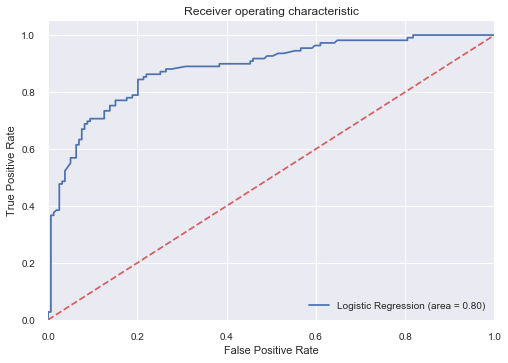

In [216]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [217]:
np.mean((y_test==logis_pre))

0.8134328358208955

In [218]:
#print(classification_report(y_test,logis_pre))

In [219]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [220]:
rfc_pre = rfc.predict(X_test)

In [221]:
confusion_matrix(y_test, rfc_pre)

array([[152,   7],
       [ 40,  69]], dtype=int64)

In [222]:
#print(classification_report(y_test,rfc_pre))

In [223]:
np.mean((y_test==rfc_pre))

0.8246268656716418

In [224]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [225]:
correct_rate =[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pre = knn.predict(X_test)
    correct_rate.append(np.mean((y_test==knn_pre)))

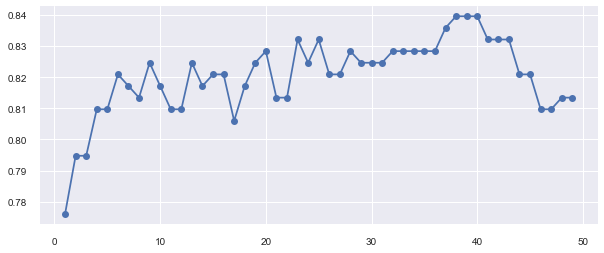

In [226]:
plt.figure(figsize = (10,4))
plt.plot(range(1,50), correct_rate, marker ='o' )

In [227]:
np.max(correct_rate)

0.8395522388059702

In [228]:
knn_pre = knn.predict(X_test)

In [229]:
confusion_matrix(y_test, knn_pre)

array([[146,  13],
       [ 37,  72]], dtype=int64)

In [230]:
X_train

array([[ 0.81028877, -1.36783323,  2.56251778, ..., -0.80507649,
         0.22429519, -0.37944219],
       [-1.59930504,  0.73108328, -0.57700744, ...,  1.24211801,
        -0.70727751,  0.83907577],
       [ 0.81028877,  0.73108328, -0.57700744, ...,  1.24211801,
         2.08744061, -1.59796014],
       ...,
       [ 0.81028877, -1.36783323,  0.99275517, ...,  1.24211801,
         1.1558679 , -1.59796014],
       [ 0.81028877,  0.73108328, -0.57700744, ..., -0.80507649,
        -0.70727751, -0.37944219],
       [-0.39450813,  0.73108328, -0.57700744, ...,  1.24211801,
        -0.70727751,  0.83907577]])

In [231]:
# importances = pd.DataFrame({'feature':feature,'importance':np.round(rfc.feature_importances_,3)})
# importances = importances.sort_values('importance',ascending=False).set_index('feature')
# importances.head(15)

# cross validation

In [232]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.



accuracies = cross_val_score(LogisticRegression(), newdata,y_data, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.8206278  0.83856502 0.80717489 0.83408072 0.8161435  0.79820628
 0.78026906 0.85201794 0.80269058 0.81165919]
Mean Cross-Validation accuracy score: 0.81614


C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\si

In [233]:
from sklearn.linear_model import ElasticNet

In [234]:
knn = KNeighborsClassifier()
k_range = range(1,50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_data,y_data, cv = cv)
    k_scores.append(scores.mean())

print ("Mean accuracy score: {}".format(np.max(k_scores)))

Mean accuracy score: 0.8040358744394618


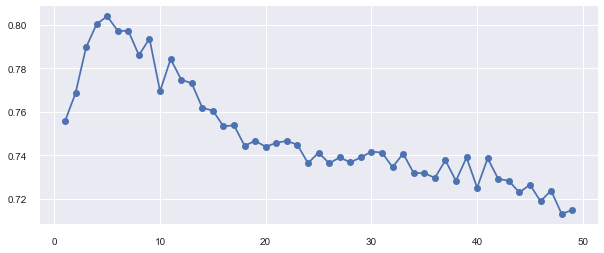

In [235]:
plt.figure(figsize = (10,4))
plt.plot(range(1,50), k_scores, marker ='o' )

In [236]:
from sklearn.ensemble import RandomForestClassifier

rfc_accuracies = cross_val_score(RandomForestClassifier(), x_data,y_data, cv  = cv)

print ("Mean Cross-Validation accuracy score: {}".format(round(rfc_accuracies.mean(),5)))

Mean Cross-Validation accuracy score: 0.8


C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

In [237]:
from sklearn.svm import SVC
svm_model = SVC(kernel= 'linear', random_state=1)
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [238]:
svm_pre = svm_model.predict(X_test)
np.mean((y_test==svm_pre))

0.8171641791044776

In [239]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train, y_train)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

0.825


C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50261\AppData\Local\Progra

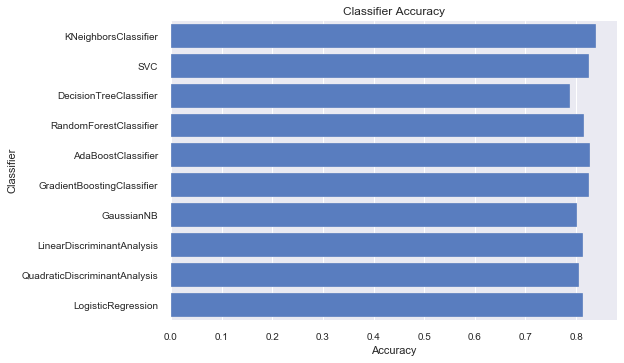

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
classifiers = [
    KNeighborsClassifier(40),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
   ]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = x_data
y = y_data

acc_dict = {}

for train_index, test_index in sss.split(X, y):

	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [284]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.839552
0,SVC,0.824627
0,DecisionTreeClassifier,0.788433
0,RandomForestClassifier,0.815672
0,AdaBoostClassifier,0.828358
0,GradientBoostingClassifier,0.824627
0,GaussianNB,0.802239
0,LinearDiscriminantAnalysis,0.813433
0,QuadraticDiscriminantAnalysis,0.805970
0,LogisticRegression,0.813433


In [242]:
from sklearn.model_selection import GridSearchCV

In [286]:

adaDTC = AdaBoostClassifier( random_state=0)
ada_param_grid = {


              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=10, scoring="accuracy", verbose = 1,n_jobs= 4)
gsadaDTC.fit(X_train, y_train)


ada_best = gsadaDTC.best_estimator_


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 140 out of 140 | elapsed:    1.0s finished


In [287]:
gsadaDTC.best_score_

0.7736757624398074

In [245]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier( random_state=0)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=10, scoring="accuracy", verbose = 1,n_jobs= 4)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_
gsGBC.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 348 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:    9.6s finished
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': 0.1,
 'min_samples_leaf': 100,
 'n_estimators': 300}

In [246]:
gsGBC.best_score_


0.8105939004815409

In [247]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=10, scoring="accuracy", verbose = 1,n_jobs= 4)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_
gsSVMC.best_params_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    3.7s finished


{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}

In [248]:
gsSVMC.best_score_


0.8330658105939005

In [249]:
a = range(1,40)
num_1 = []
for i in a:
    num_1.append(i)

In [250]:

knn_param_grid ={
        'n_neighbors':num_1,

          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']
}
KNN = KNeighborsClassifier()
gsKNN = GridSearchCV(KNN,param_grid = knn_param_grid, cv=10, scoring="accuracy", verbose = 1,n_jobs= 4)
gsKNN.fit(X_train, y_train)

KNN_best = gsKNN.best_estimator_
gsKNN.best_score_
gsKNN.best_params_

Fitting 10 folds for each of 312 candidates, totalling 3120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 3120 out of 3120 | elapsed:    2.0s finished
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}

In [251]:
gsKNN.best_score_


0.8282504012841091

In [252]:
# candidate_classifier = SVC()
# candidate_classifier.fit(x_data, y_data)
# result = candidate_classifier.predict(test)

In [253]:
# gradient_boost = GradientBoostingClassifier()
# gradient_boost.fit(x_data, y_data)
# result = gradient_boost.predict(test)

In [254]:
# RFC Parameters tunning 
RFC = RandomForestClassifier( random_state=0)


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=10, scoring="accuracy",n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    7.7s finished


0.8282504012841091

In [268]:
from sklearn.ensemble import ExtraTreesClassifier
ExtC = ExtraTreesClassifier( random_state=0)


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],

              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=10, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    7.4s finished


0.8250401284109149

In [279]:
from sklearn.utils.testing import ignore_warnings
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(x_data, y_data)
result = votingC.predict(test)


In [280]:
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": result
    })


In [281]:


submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission4.csv", index=False)